In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


from sklearn.cluster import KMeans
import pandas as pd
import pickle
import string
import re
import string
from sklearn.model_selection import cross_validate as cross_validation, ShuffleSplit, cross_val_score, train_test_split, KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.svm import *
# from sklearn.tree import *
from sklearn.neural_network import *
from sklearn.linear_model import *
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import *
from sklearn.impute import IterativeImputer
from sklearn.naive_bayes import *
import pickle
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [2]:
data = pd.read_pickle('imputed_data_forest_corr.pkl')
print(list(data.columns))
data.shape

['ITERATION', 'GPS_LAT', 'GPS_LON', 'GPS_ALT', 'HHsizemembers', 'LandCultivated', 'LivestockHoldings', 'NrofMonthsFoodInsecure', 'PPI_Threshold', 'PPI_Likelihood', 'score_HDDS_GoodSeason', 'score_HDDS_farmbasedGoodSeason', 'score_HDDS_purchasedGoodSeason', 'score_HDDS_BadSeason', 'score_HDDS_farmbasedBadSeason', 'score_HDDS_purchasedBadSeason', 'total_income_USD_PPP_pHH_Yr', 'offfarm_income_USD_PPP_pHH_Yr', 'value_farm_produce_USD_PPP_pHH_Yr', 'crop_sales_USD_PPP_pHH_Yr', 'value_crop_consumed_USD_PPP_pHH_Yr', 'value_livestock_production_USD_PPP_pHH_Yr', 'value_livestock_prod_consumed_USD_PPP_pHH_Yr', 'Market_Orientation', 'Livestock_Orientation', 'Food_Availability_kCal_MAE_day', 'Food_Self_Sufficiency_kCal_MAE_day', 'NrofMonthsWildFoodCons', 'GHGEmissions', 'Gender_MaleControl', 'Gender_FemaleControl', 'NFertInput', 'Food_InsecurityLevel', 'sinBestFoodSecMonth', 'cosBestFoodSecMonth', 'sinWorstFoodSecMonth', 'cosWorstFoodSecMonth', 'Head_EducationLevel_<Other>', 'Head_EducationLevel_<

(35728, 90)

In [3]:
X = data.drop(['Food_InsecurityLevel'],axis=1)
y = data['Food_InsecurityLevel']
print(y)

from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_new2 = scaler.fit_transform(X_new)
# X_new2

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_new = scaler.fit_transform(X)

X_newer = pd.DataFrame(X_new)
X_newer.columns = [X.columns.tolist()]
X_newer

fs_ = SelectKBest(score_func=mutual_info_classif, k=70)
fs_.fit(X_newer, y)
mi_support = fs_.get_support()
X_new1 = fs_.transform(X_newer)

# clf = ExtraTreesClassifier(n_estimators=60)
# clf = clf.fit(X, y)
# clf.feature_importances_  
# model = SelectFromModel(clf, prefit=True)

# lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_new, y)
# model = SelectFromModel(lsvc, prefit=True)
# X_new1 = model.transform(X_new)

# transformer = SelectFromModel(estimator=AdaBoostClassifier()).fit(X_new, y)
# X_new1 = transformer.transform(X_new)

# from keras.utils import to_categorical
# y = to_categorical(y)
# y = y[:,[1,2,3,4]]
print(X_new1.shape)
y.shape

0        3
1        4
2        4
3        2
4        4
        ..
35723    1
35724    1
35725    1
35726    1
35727    1
Name: Food_InsecurityLevel, Length: 35728, dtype: int32
(35728, 70)


(35728,)

In [4]:
vector_names = list(X.columns[fs_.get_support(indices=True)])
len(vector_names)

70

In [5]:
X

,ITERATION,GPS_LAT,GPS_LON,GPS_ALT,HHsizemembers,LandCultivated,LivestockHoldings,NrofMonthsFoodInsecure,PPI_Threshold,PPI_Likelihood,score_HDDS_GoodSeason,score_HDDS_farmbasedGoodSeason,score_HDDS_purchasedGoodSeason,score_HDDS_BadSeason,score_HDDS_farmbasedBadSeason,score_HDDS_purchasedBadSeason,total_income_USD_PPP_pHH_Yr,offfarm_income_USD_PPP_pHH_Yr,value_farm_produce_USD_PPP_pHH_Yr,crop_sales_USD_PPP_pHH_Yr,value_crop_consumed_USD_PPP_pHH_Yr,value_livestock_production_USD_PPP_pHH_Yr,value_livestock_prod_consumed_USD_PPP_pHH_Yr,Market_Orientation,Livestock_Orientation,Food_Availability_kCal_MAE_day,Food_Self_Sufficiency_kCal_MAE_day,NrofMonthsWildFoodCons,GHGEmissions,Gender_MaleControl,Gender_FemaleControl,NFertInput,sinBestFoodSecMonth,cosBestFoodSecMonth,sinWorstFoodSecMonth,cosWorstFoodSecMonth,Head_EducationLevel_<Other>,Head_EducationLevel_<illiterate>,Head_EducationLevel_<literate>,Head_EducationLevel_<no_school>,...,HouseholdType_<nonparenthead>,HouseholdType_<other>,HouseholdType_<polygamous>,HouseholdType_<single>,HouseholdType_<together>,HouseholdType_<woman_single>,HouseholdType_<workaway>,Country_<Bolivia>,Country_<Burkina_Faso>,Country_<Burundi>,Country_<Cambodia>,Country_<Comoros>,Country_<Costa_Rica>,Country_<Cote d'Ivoire>,Country_<DRC>,Country_<Ecuador>,Country_<El_Salvador>,Country_<Ethiopia>,Country_<Ghana>,Country_<Guatemala>,Country_<Honduras>,Country_<India>,Country_<Kenya>,Country_<LaoPDR>,Country_<Malawi>,Country_<Mali>,Country_<Morocco>,Country_<Nicaragua>,Country_<Niger>,Country_<Nigeria>,Country_<Palestine>,Country_<Peru>,Country_<Rwanda>,Country_<Senegal>,Country_<Sierra Leone>,Country_<South Africa>,Country_<Tanzania>,Country_<Uganda>,Country_<Vietnam>,Country_<Zambia>
0,1.0,11.19,-0.95,254.00,7.0,2.00,1.040,4.0,1.9,44.69,5.0,0.0,0.0,2.0,0.0,0.0,246.141708,49.228342,274.373884,164.857702,77.460517,32.055664,0.0,0.717683,0.116832,4621.267353,754.360895,0.0,702.949550,0.696542,0.303458,135.0,-0.866025,0.500000,5.000000e-01,-8.660254e-01,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,11.19,-0.95,346.00,10.0,1.20,4.000,3.0,1.9,40.68,4.0,0.0,0.0,2.0,0.0,0.0,18.317522,0.000000,298.162446,0.000000,279.844923,18.317522,0.0,0.061435,0.061435,2503.023263,2303.522017,0.0,15127.399228,0.539852,0.460148,100.0,-0.500000,0.866025,5.000000e-01,8.660254e-01,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,11.19,-0.99,324.00,6.0,0.80,0.300,4.0,1.9,55.03,4.0,0.0,0.0,2.0,0.0,0.0,0.000000,0.000000,23.278518,0.000000,23.278518,0.000000,0.0,0.000000,0.000000,381.108158,381.108158,9.0,113.654565,0.695815,0.304185,50.0,-0.866025,0.500000,-5.000000e-01,8.660254e-01,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,11.19,-0.99,326.00,6.0,0.80,2.595,4.0,1.9,32.23,5.0,0.0,0.0,1.0,0.0,0.0,476.255585,238.127792,264.840846,228.969031,26.713054,9.158761,0.0,0.899135,0.034582,1565.751162,620.787518,4.0,8131.192450,0.243574,0.756426,150.0,-0.866025,0.500000,-5.000000e-01,8.660254e-01,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,11.22,-1.02,308.00,8.0,4.00,2.120,4.0,1.9,51.67,2.0,0.0,0.0,1.0,0.0,0.0,32.971540,0.000000,194.809347,22.896903,161.837807,10.074637,0.0,0.169250,0.051715,2209.261281,1767.543491,0.0,13331.792068,0.606037,0.393963,250.0,-0.866025,0.500000,1.224647e-16,-1.000000e+00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...

In [6]:
X_new1 = pd.DataFrame(X_new1)
X_new1.columns = [vector_names]
X_new1

,GPS_LAT,GPS_LON,GPS_ALT,HHsizemembers,LandCultivated,LivestockHoldings,NrofMonthsFoodInsecure,PPI_Threshold,PPI_Likelihood,score_HDDS_GoodSeason,score_HDDS_farmbasedGoodSeason,score_HDDS_purchasedGoodSeason,score_HDDS_BadSeason,score_HDDS_farmbasedBadSeason,score_HDDS_purchasedBadSeason,total_income_USD_PPP_pHH_Yr,offfarm_income_USD_PPP_pHH_Yr,value_farm_produce_USD_PPP_pHH_Yr,crop_sales_USD_PPP_pHH_Yr,value_crop_consumed_USD_PPP_pHH_Yr,value_livestock_production_USD_PPP_pHH_Yr,value_livestock_prod_consumed_USD_PPP_pHH_Yr,Market_Orientation,Livestock_Orientation,Food_Availability_kCal_MAE_day,Food_Self_Sufficiency_kCal_MAE_day,NrofMonthsWildFoodCons,GHGEmissions,Gender_MaleControl,Gender_FemaleControl,NFertInput,sinBestFoodSecMonth,cosBestFoodSecMonth,sinWorstFoodSecMonth,cosWorstFoodSecMonth,Head_EducationLevel_<Other>,Head_EducationLevel_<no_school>,Head_EducationLevel_<postsecondary>,Head_EducationLevel_<primary>,HouseholdType_<couple>,HouseholdType_<couple_polygamous>,HouseholdType_<couple_woman_works_away>,HouseholdType_<man_single>,HouseholdType_<nonparenthead>,HouseholdType_<single>,HouseholdType_<together>,HouseholdType_<woman_single>,Country_<Bolivia>,Country_<Burkina_Faso>,Country_<Cambodia>,Country_<Costa_Rica>,Country_<DRC>,Country_<Ecuador>,Country_<Ethiopia>,Country_<Ghana>,Country_<Guatemala>,Country_<India>,Country_<Kenya>,Country_<LaoPDR>,Country_<Malawi>,Country_<Mali>,Country_<Morocco>,Country_<Niger>,Country_<Nigeria>,Country_<Palestine>,Country_<Peru>,Country_<Rwanda>,Country_<Uganda>,Country_<Vietnam>,Country_<Zambia>
0,0.480967,0.453380,0.215026,0.6,0.400,0.201161,0.333333,0.2,0.4469,0.5,0.0,0.0,0.2,0.0,0.0,0.036220,0.117181,0.074347,0.067924,0.059694,0.019407,0.0,0.733125,0.116832,0.556336,0.220502,0.000000,0.031776,0.696542,0.303458,0.317647,0.066987,0.750000,0.750000,0.066987,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.480967,0.453380,0.224076,0.9,0.240,0.773694,0.250000,0.2,0.4068,0.4,0.0,0.0,0.2,0.0,0.0,0.002695,0.000000,0.080793,0.000000,0.215659,0.011090,0.0,0.112771,0.061435,0.301329,0.673327,0.000000,0.683807,0.539852,0.460148,0.235294,0.250000,0.933013,0.750000,0.933013,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.480967,0.453175,0.221912,0.5,0.160,0.058027,0.333333,0.2,0.5503,0.4,0.0,0.0,0.2,0.0,0.0,0.000000,0.000000,0.006308,0.000000,0.017939,0.000000,0.0,0.054697,0.000000,0.045880,0.111399,0.750000,0.005138,0.695815,0.304185,0.117647,0.066987,0.750000,0.250000,0.933013,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.480967,0.453175,0.222108,0.5,0.160,0.501934,0.333333,0.2,0.3223,0.5,0.0,0.0,0.1,0.0,0.0,0.070081,0.566828,0.071764,0.094339,0.020586,0.005545,0.0,0.904652,0.034582,0.188494,0.181458,0.333333,0.367556,0.243574,0.756426,0.352941,0.066987,0.750000,0.250000,0.933013,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.481127,0.453022,0.220338,0.7,0.800,0.410058,0.333333,0.2,0.5167,0.2,0.0,0.0,0.1,0.0,0.0,0.004852,0.000000,0.052788,0.009434,0.124718,0.006099,0.0,0.214690,0.051715,0.265964,0.516658,0.000000,0.602640,0.606037,0.393963,0.588235,0.066987,0.750000,0.500000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35723,0.347215,0.625147,0.300171,0.5,0.868,0.692456,0.166667,0.2,0.8510,1.0,0.3,0.3,0.8,0.3,0.3,0.437039,0.000000,

In [7]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X_new1, y, test_size=0.25, random_state=0)
# X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=0.25, random_state=0)

In [8]:
X_test_val

,GPS_LAT,GPS_LON,GPS_ALT,HHsizemembers,LandCultivated,LivestockHoldings,NrofMonthsFoodInsecure,PPI_Threshold,PPI_Likelihood,score_HDDS_GoodSeason,score_HDDS_farmbasedGoodSeason,score_HDDS_purchasedGoodSeason,score_HDDS_BadSeason,score_HDDS_farmbasedBadSeason,score_HDDS_purchasedBadSeason,total_income_USD_PPP_pHH_Yr,offfarm_income_USD_PPP_pHH_Yr,value_farm_produce_USD_PPP_pHH_Yr,crop_sales_USD_PPP_pHH_Yr,value_crop_consumed_USD_PPP_pHH_Yr,value_livestock_production_USD_PPP_pHH_Yr,value_livestock_prod_consumed_USD_PPP_pHH_Yr,Market_Orientation,Livestock_Orientation,Food_Availability_kCal_MAE_day,Food_Self_Sufficiency_kCal_MAE_day,NrofMonthsWildFoodCons,GHGEmissions,Gender_MaleControl,Gender_FemaleControl,NFertInput,sinBestFoodSecMonth,cosBestFoodSecMonth,sinWorstFoodSecMonth,cosWorstFoodSecMonth,Head_EducationLevel_<Other>,Head_EducationLevel_<no_school>,Head_EducationLevel_<postsecondary>,Head_EducationLevel_<primary>,HouseholdType_<couple>,HouseholdType_<couple_polygamous>,HouseholdType_<couple_woman_works_away>,HouseholdType_<man_single>,HouseholdType_<nonparenthead>,HouseholdType_<single>,HouseholdType_<together>,HouseholdType_<woman_single>,Country_<Bolivia>,Country_<Burkina_Faso>,Country_<Cambodia>,Country_<Costa_Rica>,Country_<DRC>,Country_<Ecuador>,Country_<Ethiopia>,Country_<Ghana>,Country_<Guatemala>,Country_<India>,Country_<Kenya>,Country_<LaoPDR>,Country_<Malawi>,Country_<Mali>,Country_<Morocco>,Country_<Niger>,Country_<Nigeria>,Country_<Palestine>,Country_<Peru>,Country_<Rwanda>,Country_<Uganda>,Country_<Vietnam>,Country_<Zambia>
12048,0.480271,0.457365,0.216580,0.1,0.16000,0.382979,0.166667,0.200000,0.0903,0.80,0.20,0.50,0.7,0.2,0.50,0.044544,0.144115,0.370054,0.073368,0.803460,0.087785,0.846318,0.222328,0.106175,0.779635,0.762679,0.000000,0.854920,0.588115,0.411885,0.588235,0.933013,0.750000,0.50,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18238,0.995759,0.527492,0.336787,0.1,0.30000,0.075435,0.166667,0.333333,0.0000,0.40,0.20,0.11,0.4,0.2,0.14,0.044773,0.000000,0.082447,0.125363,0.000000,0.000000,0.000000,1.000000,0.000000,0.135727,0.003892,0.250000,0.019779,1.000000,0.000000,0.122941,0.933013,0.750000,0.75,0.933013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35583,0.350424,0.625556,0.284774,0.3,0.49675,0.543520,0.166667,0.200000,0.6490,1.00,0.40,0.00,0.5,0.1,0.10,0.000589,0.000000,0.315694,0.000000,0.557204,0.267599,0.933538,0.057946,0.379387,0.394167,0.952225,0.250000,0.718332,0.000810,0.999190,0.470588,0.500000,1.000000,1.00,0.500000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24486,0.446157,0.499264,0.197202,0.4,0.16000,0.058027,0.166667,0.200000,0.0050,0.76,0.22,0.42,1.0,0.1,0.50,0.052069,0.168459,0.128978,0.116635,0.148656,0.000000,0.000000,0.616899,0.000000,0.274333,0.252682,0.000000,0.055550,0.500000,0.500000,0.340471,0.933013,0.750000,0.50,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16991,0.422032,0.640934,0.405145,0.3,0.04000,0.500580,0.166667,0.200000,0.2390,1.00,0.60,0.20,0.5,0.0,0.20,0.034657,0.000000,0.165033,0.000000,0.160794,0.242405,0.547750,0.420258,0.657412,0.272016,0.317500,0.000000,0.373875,0.500000,0.500000,0.117647,0.000000,0.500000,0.75,0.066987,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19369,0.355504,0.685536,0.226505,0

In [9]:
X_train

,GPS_LAT,GPS_LON,GPS_ALT,HHsizemembers,LandCultivated,LivestockHoldings,NrofMonthsFoodInsecure,PPI_Threshold,PPI_Likelihood,score_HDDS_GoodSeason,score_HDDS_farmbasedGoodSeason,score_HDDS_purchasedGoodSeason,score_HDDS_BadSeason,score_HDDS_farmbasedBadSeason,score_HDDS_purchasedBadSeason,total_income_USD_PPP_pHH_Yr,offfarm_income_USD_PPP_pHH_Yr,value_farm_produce_USD_PPP_pHH_Yr,crop_sales_USD_PPP_pHH_Yr,value_crop_consumed_USD_PPP_pHH_Yr,value_livestock_production_USD_PPP_pHH_Yr,value_livestock_prod_consumed_USD_PPP_pHH_Yr,Market_Orientation,Livestock_Orientation,Food_Availability_kCal_MAE_day,Food_Self_Sufficiency_kCal_MAE_day,NrofMonthsWildFoodCons,GHGEmissions,Gender_MaleControl,Gender_FemaleControl,NFertInput,sinBestFoodSecMonth,cosBestFoodSecMonth,sinWorstFoodSecMonth,cosWorstFoodSecMonth,Head_EducationLevel_<Other>,Head_EducationLevel_<no_school>,Head_EducationLevel_<postsecondary>,Head_EducationLevel_<primary>,HouseholdType_<couple>,HouseholdType_<couple_polygamous>,HouseholdType_<couple_woman_works_away>,HouseholdType_<man_single>,HouseholdType_<nonparenthead>,HouseholdType_<single>,HouseholdType_<together>,HouseholdType_<woman_single>,Country_<Bolivia>,Country_<Burkina_Faso>,Country_<Cambodia>,Country_<Costa_Rica>,Country_<DRC>,Country_<Ecuador>,Country_<Ethiopia>,Country_<Ghana>,Country_<Guatemala>,Country_<India>,Country_<Kenya>,Country_<LaoPDR>,Country_<Malawi>,Country_<Mali>,Country_<Morocco>,Country_<Niger>,Country_<Nigeria>,Country_<Palestine>,Country_<Peru>,Country_<Rwanda>,Country_<Uganda>,Country_<Vietnam>,Country_<Zambia>
5623,0.408556,0.605477,0.359062,1.0,0.8020,0.239845,0.000000,0.2,0.2458,0.5,0.1,0.1,0.5,0.1,0.1,0.030186,0.000000,0.201500,0.000000,0.414976,0.124194,0.000000,0.315470,0.275862,0.038284,0.053065,0.000000,0.026258,0.975833,0.024167,0.290353,0.750000,0.933013,0.75,0.933013,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32426,0.594856,0.460231,0.238978,0.4,0.4800,0.633462,1.000000,0.2,0.1670,0.9,0.6,0.0,0.8,0.4,0.0,0.524528,0.669662,0.841177,0.068280,0.277167,0.946402,0.094924,0.801561,0.830758,0.841754,0.172726,0.000000,0.286775,0.840310,0.159690,0.381176,0.933013,0.750000,0.00,0.500000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5934,0.454067,0.427119,0.214440,0.0,0.2000,0.000000,0.166667,0.2,0.3583,0.5,0.0,0.5,0.3,0.0,0.1,0.806532,0.000000,0.970414,0.978906,0.439007,0.000000,0.000000,0.975989,0.000000,0.917356,0.594566,0.333333,0.019936,1.000000,0.000000,0.235294,0.750000,0.066987,0.25,0.066987,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16092,0.421658,0.634548,0.329877,0.3,0.1440,0.328820,0.250000,0.2,0.0758,0.0,0.0,0.0,0.8,0.4,0.2,0.910266,0.000000,0.951948,0.797592,0.304014,0.804725,0.574143,0.920099,0.655134,0.872330,0.877238,0.333333,0.594628,0.673858,0.326142,0.558824,0.750000,0.933013,0.50,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30533,0.376147,0.628110,0.313981,1.0,0.8980,0.546615,0.000000,0.2,0.1190,0.6,0.5,0.0,0.6,0.5,0.0,0.233292,0.000000,0.961022,0.008183,0.941499,0.957199,0.205578,0.110485,0.942762,0.534121,0.559146,0.000000,0.465996,0.956363,0.043637,0.364706,0.066987,0.250000,0.75,0.933013,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20757,0.489630,0.435498,0.226535,1.0,0.8424,0.270793,0.166667,1.0,0.9060,0.7,0.1,0.1,0

In [10]:
print(len(X_train))
# print(len(X_val))
# print(len(X_test))
print(len(y_train))
# print(len(y_val))
# print(len(y_test))

# X_train

26796
26796


In [11]:
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Model

input_layer = Input(shape=(70,))
hidden_layer1 = Dense(256, activation='relu')(input_layer)
dropout_1 = Dropout(0.6)(hidden_layer1)
hidden_layer2 = Dense(256, activation='relu')(dropout_1)
dropout_2 = Dropout(0.6)(hidden_layer2)
hidden_layer3 = Dense(128, activation='relu')(dropout_2)
dropout_3 = Dropout(0.6)(hidden_layer3)
hidden_layer4 = Dense(128, activation='relu')(dropout_3)
dropout_4 = Dropout(0.6)(hidden_layer4)
hidden_layer5 = Dense(128, activation='relu')(dropout_4)
output = Dense(5, activation='softmax')(dropout_3)
model = Model(inputs = input_layer, outputs = output)



# model = Sequential()
# model.add(Dense(300, input_dim=89, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(300, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(300, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(5, activation='softmax'))

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 70)]              0         
_________________________________________________________________
dense (Dense)                (None, 256)               18176     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0     

In [13]:
X_train

,GPS_LAT,GPS_LON,GPS_ALT,HHsizemembers,LandCultivated,LivestockHoldings,NrofMonthsFoodInsecure,PPI_Threshold,PPI_Likelihood,score_HDDS_GoodSeason,score_HDDS_farmbasedGoodSeason,score_HDDS_purchasedGoodSeason,score_HDDS_BadSeason,score_HDDS_farmbasedBadSeason,score_HDDS_purchasedBadSeason,total_income_USD_PPP_pHH_Yr,offfarm_income_USD_PPP_pHH_Yr,value_farm_produce_USD_PPP_pHH_Yr,crop_sales_USD_PPP_pHH_Yr,value_crop_consumed_USD_PPP_pHH_Yr,value_livestock_production_USD_PPP_pHH_Yr,value_livestock_prod_consumed_USD_PPP_pHH_Yr,Market_Orientation,Livestock_Orientation,Food_Availability_kCal_MAE_day,Food_Self_Sufficiency_kCal_MAE_day,NrofMonthsWildFoodCons,GHGEmissions,Gender_MaleControl,Gender_FemaleControl,NFertInput,sinBestFoodSecMonth,cosBestFoodSecMonth,sinWorstFoodSecMonth,cosWorstFoodSecMonth,Head_EducationLevel_<Other>,Head_EducationLevel_<no_school>,Head_EducationLevel_<postsecondary>,Head_EducationLevel_<primary>,HouseholdType_<couple>,HouseholdType_<couple_polygamous>,HouseholdType_<couple_woman_works_away>,HouseholdType_<man_single>,HouseholdType_<nonparenthead>,HouseholdType_<single>,HouseholdType_<together>,HouseholdType_<woman_single>,Country_<Bolivia>,Country_<Burkina_Faso>,Country_<Cambodia>,Country_<Costa_Rica>,Country_<DRC>,Country_<Ecuador>,Country_<Ethiopia>,Country_<Ghana>,Country_<Guatemala>,Country_<India>,Country_<Kenya>,Country_<LaoPDR>,Country_<Malawi>,Country_<Mali>,Country_<Morocco>,Country_<Niger>,Country_<Nigeria>,Country_<Palestine>,Country_<Peru>,Country_<Rwanda>,Country_<Uganda>,Country_<Vietnam>,Country_<Zambia>
5623,0.408556,0.605477,0.359062,1.0,0.8020,0.239845,0.000000,0.2,0.2458,0.5,0.1,0.1,0.5,0.1,0.1,0.030186,0.000000,0.201500,0.000000,0.414976,0.124194,0.000000,0.315470,0.275862,0.038284,0.053065,0.000000,0.026258,0.975833,0.024167,0.290353,0.750000,0.933013,0.75,0.933013,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32426,0.594856,0.460231,0.238978,0.4,0.4800,0.633462,1.000000,0.2,0.1670,0.9,0.6,0.0,0.8,0.4,0.0,0.524528,0.669662,0.841177,0.068280,0.277167,0.946402,0.094924,0.801561,0.830758,0.841754,0.172726,0.000000,0.286775,0.840310,0.159690,0.381176,0.933013,0.750000,0.00,0.500000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5934,0.454067,0.427119,0.214440,0.0,0.2000,0.000000,0.166667,0.2,0.3583,0.5,0.0,0.5,0.3,0.0,0.1,0.806532,0.000000,0.970414,0.978906,0.439007,0.000000,0.000000,0.975989,0.000000,0.917356,0.594566,0.333333,0.019936,1.000000,0.000000,0.235294,0.750000,0.066987,0.25,0.066987,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16092,0.421658,0.634548,0.329877,0.3,0.1440,0.328820,0.250000,0.2,0.0758,0.0,0.0,0.0,0.8,0.4,0.2,0.910266,0.000000,0.951948,0.797592,0.304014,0.804725,0.574143,0.920099,0.655134,0.872330,0.877238,0.333333,0.594628,0.673858,0.326142,0.558824,0.750000,0.933013,0.50,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30533,0.376147,0.628110,0.313981,1.0,0.8980,0.546615,0.000000,0.2,0.1190,0.6,0.5,0.0,0.6,0.5,0.0,0.233292,0.000000,0.961022,0.008183,0.941499,0.957199,0.205578,0.110485,0.942762,0.534121,0.559146,0.000000,0.465996,0.956363,0.043637,0.364706,0.066987,0.250000,0.75,0.933013,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20757,0.489630,0.435498,0.226535,1.0,0.8424,0.270793,0.166667,1.0,0.9060,0.7,0.1,0.1,0

In [14]:
X_test_val

,GPS_LAT,GPS_LON,GPS_ALT,HHsizemembers,LandCultivated,LivestockHoldings,NrofMonthsFoodInsecure,PPI_Threshold,PPI_Likelihood,score_HDDS_GoodSeason,score_HDDS_farmbasedGoodSeason,score_HDDS_purchasedGoodSeason,score_HDDS_BadSeason,score_HDDS_farmbasedBadSeason,score_HDDS_purchasedBadSeason,total_income_USD_PPP_pHH_Yr,offfarm_income_USD_PPP_pHH_Yr,value_farm_produce_USD_PPP_pHH_Yr,crop_sales_USD_PPP_pHH_Yr,value_crop_consumed_USD_PPP_pHH_Yr,value_livestock_production_USD_PPP_pHH_Yr,value_livestock_prod_consumed_USD_PPP_pHH_Yr,Market_Orientation,Livestock_Orientation,Food_Availability_kCal_MAE_day,Food_Self_Sufficiency_kCal_MAE_day,NrofMonthsWildFoodCons,GHGEmissions,Gender_MaleControl,Gender_FemaleControl,NFertInput,sinBestFoodSecMonth,cosBestFoodSecMonth,sinWorstFoodSecMonth,cosWorstFoodSecMonth,Head_EducationLevel_<Other>,Head_EducationLevel_<no_school>,Head_EducationLevel_<postsecondary>,Head_EducationLevel_<primary>,HouseholdType_<couple>,HouseholdType_<couple_polygamous>,HouseholdType_<couple_woman_works_away>,HouseholdType_<man_single>,HouseholdType_<nonparenthead>,HouseholdType_<single>,HouseholdType_<together>,HouseholdType_<woman_single>,Country_<Bolivia>,Country_<Burkina_Faso>,Country_<Cambodia>,Country_<Costa_Rica>,Country_<DRC>,Country_<Ecuador>,Country_<Ethiopia>,Country_<Ghana>,Country_<Guatemala>,Country_<India>,Country_<Kenya>,Country_<LaoPDR>,Country_<Malawi>,Country_<Mali>,Country_<Morocco>,Country_<Niger>,Country_<Nigeria>,Country_<Palestine>,Country_<Peru>,Country_<Rwanda>,Country_<Uganda>,Country_<Vietnam>,Country_<Zambia>
12048,0.480271,0.457365,0.216580,0.1,0.16000,0.382979,0.166667,0.200000,0.0903,0.80,0.20,0.50,0.7,0.2,0.50,0.044544,0.144115,0.370054,0.073368,0.803460,0.087785,0.846318,0.222328,0.106175,0.779635,0.762679,0.000000,0.854920,0.588115,0.411885,0.588235,0.933013,0.750000,0.50,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18238,0.995759,0.527492,0.336787,0.1,0.30000,0.075435,0.166667,0.333333,0.0000,0.40,0.20,0.11,0.4,0.2,0.14,0.044773,0.000000,0.082447,0.125363,0.000000,0.000000,0.000000,1.000000,0.000000,0.135727,0.003892,0.250000,0.019779,1.000000,0.000000,0.122941,0.933013,0.750000,0.75,0.933013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35583,0.350424,0.625556,0.284774,0.3,0.49675,0.543520,0.166667,0.200000,0.6490,1.00,0.40,0.00,0.5,0.1,0.10,0.000589,0.000000,0.315694,0.000000,0.557204,0.267599,0.933538,0.057946,0.379387,0.394167,0.952225,0.250000,0.718332,0.000810,0.999190,0.470588,0.500000,1.000000,1.00,0.500000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24486,0.446157,0.499264,0.197202,0.4,0.16000,0.058027,0.166667,0.200000,0.0050,0.76,0.22,0.42,1.0,0.1,0.50,0.052069,0.168459,0.128978,0.116635,0.148656,0.000000,0.000000,0.616899,0.000000,0.274333,0.252682,0.000000,0.055550,0.500000,0.500000,0.340471,0.933013,0.750000,0.50,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16991,0.422032,0.640934,0.405145,0.3,0.04000,0.500580,0.166667,0.200000,0.2390,1.00,0.60,0.20,0.5,0.0,0.20,0.034657,0.000000,0.165033,0.000000,0.160794,0.242405,0.547750,0.420258,0.657412,0.272016,0.317500,0.000000,0.373875,0.500000,0.500000,0.117647,0.000000,0.500000,0.75,0.066987,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19369,0.355504,0.685536,0.226505,0

In [15]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data = (X_test_val, y_test_val), epochs=100)

Epoch 1/100
838/838 [==============================] - 5s 5ms/step - loss: 1.3002 - accuracy: 0.4159 - val_loss: 1.0371 - val_accuracy: 0.5515
Epoch 2/100
838/838 [==============================] - 3s 4ms/step - loss: 1.0690 - accuracy: 0.5440 - val_loss: 0.9972 - val_accuracy: 0.5795
Epoch 3/100
838/838 [==============================] - 3s 4ms/step - loss: 1.0316 - accuracy: 0.5574 - val_loss: 0.9735 - val_accuracy: 0.5858
Epoch 4/100
838/838 [==============================] - 3s 4ms/step - loss: 1.0215 - accuracy: 0.5700 - val_loss: 0.9619 - val_accuracy: 0.5883
Epoch 5/100
838/838 [==============================] - 3s 4ms/step - loss: 0.9920 - accuracy: 0.5813 - val_loss: 0.9429 - val_accuracy: 0.6004
Epoch 6/100
838/838 [==============================] - 3s 4ms/step - loss: 0.9780 - accuracy: 0.5911 - val_loss: 0.9406 - val_accuracy: 0.6023
Epoch 7/100
838/838 [==============================] - 3s 4ms/step - loss: 0.9699 - accuracy: 0.5918 - val_loss: 0.9189 - val_accuracy: 0.6117

In [16]:
!pip install shap
import shap

     |████████████████████████████████| 358kB 6.5MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491629 sha256=f19d2e45b9bedcc43e635d5cf6a7497f3872e4ba88da34858effdc15346f06e7
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [17]:
tester = X_test_val.sample(n=500, random_state=0)
print(tester.shape)
tester

(500, 70)


,GPS_LAT,GPS_LON,GPS_ALT,HHsizemembers,LandCultivated,LivestockHoldings,NrofMonthsFoodInsecure,PPI_Threshold,PPI_Likelihood,score_HDDS_GoodSeason,score_HDDS_farmbasedGoodSeason,score_HDDS_purchasedGoodSeason,score_HDDS_BadSeason,score_HDDS_farmbasedBadSeason,score_HDDS_purchasedBadSeason,total_income_USD_PPP_pHH_Yr,offfarm_income_USD_PPP_pHH_Yr,value_farm_produce_USD_PPP_pHH_Yr,crop_sales_USD_PPP_pHH_Yr,value_crop_consumed_USD_PPP_pHH_Yr,value_livestock_production_USD_PPP_pHH_Yr,value_livestock_prod_consumed_USD_PPP_pHH_Yr,Market_Orientation,Livestock_Orientation,Food_Availability_kCal_MAE_day,Food_Self_Sufficiency_kCal_MAE_day,NrofMonthsWildFoodCons,GHGEmissions,Gender_MaleControl,Gender_FemaleControl,NFertInput,sinBestFoodSecMonth,cosBestFoodSecMonth,sinWorstFoodSecMonth,cosWorstFoodSecMonth,Head_EducationLevel_<Other>,Head_EducationLevel_<no_school>,Head_EducationLevel_<postsecondary>,Head_EducationLevel_<primary>,HouseholdType_<couple>,HouseholdType_<couple_polygamous>,HouseholdType_<couple_woman_works_away>,HouseholdType_<man_single>,HouseholdType_<nonparenthead>,HouseholdType_<single>,HouseholdType_<together>,HouseholdType_<woman_single>,Country_<Bolivia>,Country_<Burkina_Faso>,Country_<Cambodia>,Country_<Costa_Rica>,Country_<DRC>,Country_<Ecuador>,Country_<Ethiopia>,Country_<Ghana>,Country_<Guatemala>,Country_<India>,Country_<Kenya>,Country_<LaoPDR>,Country_<Malawi>,Country_<Mali>,Country_<Morocco>,Country_<Niger>,Country_<Nigeria>,Country_<Palestine>,Country_<Peru>,Country_<Rwanda>,Country_<Uganda>,Country_<Vietnam>,Country_<Zambia>
875,0.422669,0.530098,0.259384,0.3,0.8014,0.398453,0.000000,0.200000,0.5830,0.7,0.0,0.50,0.4,0.0,0.20,0.000749,0.001211,0.376551,0.001887,0.990012,0.000000,0.000000,0.057812,0.000000,0.688392,0.926869,0.000000,0.832317,0.989685,0.010315,0.386353,0.933013,0.750000,0.750000,0.933013,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12986,0.559047,0.894140,0.186996,0.6,0.0795,0.058027,0.000000,0.200000,0.0947,0.5,0.0,0.00,0.5,0.0,0.00,0.013808,0.044674,0.295460,0.000000,0.782432,0.045450,0.000000,0.119780,0.068849,0.322040,0.703365,0.000000,0.012976,0.000000,0.000000,0.258824,0.066987,0.250000,0.750000,0.933013,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32587,0.428664,0.618352,0.298942,0.1,0.0400,0.058027,0.583333,0.200000,0.0000,0.7,0.4,0.40,0.6,0.3,0.30,0.000000,0.000000,0.082349,0.000000,0.234199,0.000000,0.000000,0.054697,0.000000,0.059517,0.144511,0.000000,0.007497,0.000000,1.000000,0.054588,0.933013,0.750000,0.500000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11159,0.469896,0.449752,0.212272,0.6,0.3200,0.579304,0.166667,0.200000,0.1057,0.6,0.0,0.20,0.5,0.0,0.00,0.094330,0.000000,0.193790,0.264123,0.057121,0.000000,0.000000,0.902027,0.000000,0.097846,0.024818,0.000000,0.661783,1.000000,0.000000,0.529412,0.066987,0.750000,0.750000,0.933013,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29478,0.393528,0.627855,0.314028,0.9,0.7550,0.668472,0.000000,0.200000,0.3120,0.7,0.6,0.00,0.7,0.6,0.00,0.272551,0.000000,0.951274,0.081618,0.903442,0.740943,0.087587,0.239032,0.073180,0.816109,0.740648,0.250000,0.530496,0.517776,0.482224,0.600000,0.250000,0.066987,0.750000,0.933013,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18596,0.993604,0.526894,0.33415

In [18]:
explainer = shap.KernelExplainer(model.predict, tester)
shap_values = explainer.shap_values(tester)

Using 500 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


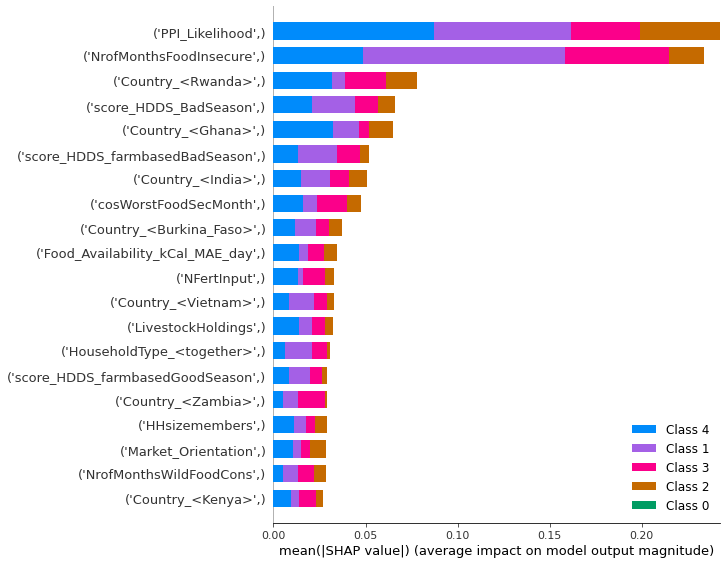

In [28]:
shap.summary_plot(shap_values, tester, plot_type="bar")

In [26]:
shap.summary_plot(shap_values, tester, plot_type='heatmap')

AssertionError: ignored

In [75]:
explainer_2 = shap.DeepExplainer(model, tester)
shap_values_2 = explainer_2.shap_values(tester)

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode. See PR #1483 for discussion.


AttributeError: ignored

In [ ]:
X.iloc[:, [23]]

,Market_Orientation
0,0.717683
1,0.061435
2,0.000000
3,0.899135
4,0.169250
...,...
35723,0.323274
35724,0.513858
35725,0.616394
35726,0.000000


In [ ]:
test.shape

(300, 70)

Train: 0.701, Validation: 0.644


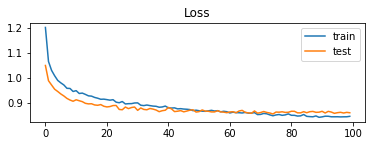

In [ ]:
# model.predict(X_test_val)
# model.evaluate(X_test_val, y_test_val)


# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test_val, y_test_val, verbose=0)
print('Train: %.3f, Validation: %.3f' % (train_acc, test_acc))
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()


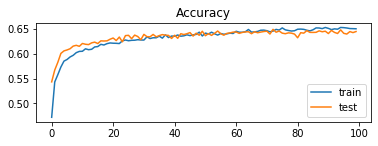

In [ ]:
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()



In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_val, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test_val, y_pred_bool))

8932/8932 [==============================] - 0s 22us/step
              precision    recall  f1-score   support

           1       0.70      0.84      0.76      3019
           2       0.67      0.24      0.35      1403
           3       0.57      0.56      0.56      2264
           4       0.63      0.72      0.67      2246

    accuracy                           0.64      8932
   macro avg       0.64      0.59      0.59      8932
weighted avg       0.64      0.64      0.63      8932



In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
model = DummyClassifier(strategy='most_frequent')
# fit model
model.fit(X_train, y_train)
# make predictions
yhat = model.predict(X_test_val)
# calculate accuracy
accuracy = accuracy_score(y_test_val, yhat)
print('Accuracy: %.3f' % accuracy)

Accuracy: 0.338


In [ ]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=100, learning_rate='adaptive').fit(X_train, y_train)
score = classifier.score(X_test_val, y_test_val)
score

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.6307657859381998

In [ ]:
y_pred = classifier.predict(X_test_val)

print(classification_report(y_test_val, y_pred))

              precision    recall  f1-score   support

           1       0.71      0.77      0.74      3019
           2       0.50      0.41      0.45      1403
           3       0.57      0.55      0.56      2264
           4       0.64      0.66      0.65      2246

    accuracy                           0.63      8932
   macro avg       0.60      0.60      0.60      8932
weighted avg       0.62      0.63      0.63      8932



In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier().fit(X_train, y_train)
score1 = classifier1.score(X_test_val, y_test_val)
print(score1)

y_pred1 = classifier1.predict(X_test_val)

print(classification_report(y_test_val, y_pred1))

In [ ]:

classifier2 = ExtraTreesClassifier().fit(X_train, y_train)
score2 = classifier2.score(X_test_val, y_test_val)
print(score1)

y_pred2 = classifier2.predict(X_test_val)

print(classification_report(y_test_val, y_pred2))